k-means clustering
==========

In [1]:
%matplotlib inline

from __future__ import division, print_function
import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial

Generate some (unlabeled) test data:

In [2]:
N = 200

c1_mean = [4, 4]
c1_cov  = [[1, -1], 
            [2,  1]]
c2_mean = [-7, -1]
c2_cov  = [[2, 3],
            [1, 2]]

X = np.concatenate((np.random.multivariate_normal(c1_mean, c1_cov, N//2),
                    np.random.multivariate_normal(c2_mean, c2_cov, N//2)))

We want to find K clusters in the data:

In [3]:
K = 3

Here comes the basic algorithm:

In [4]:
# Randomly initialize centroids by sampling from the data:
centroids = X[np.random.choice(X.shape[0], K, replace=False),:] 
    
for iteration in range(1, 1000):
    # Assignment step: Assign data points to nearest cluster centroid (by euclidean distance)
    sqdists = scipy.spatial.distance.cdist(centroids, X, 'sqeuclidean')
    y = np.argmin(sqdists, axis=0)
    
    # Move cluster step: Move centroid to mean of cluster
    new_centroids = np.empty_like(centroids)
    for k in range(K):
        new_centroids[k] = np.mean(X[y == k])
        
    # Stop iteration if centroids converged
    if np.array_equal(centroids, new_centroids):
        break
    else:
        centroids = new_centroids

Plot our result:

Converged after 7 iterations


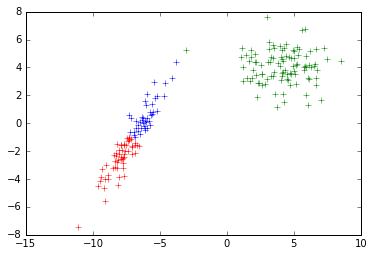

In [5]:
print("Converged after {} iterations".format(iteration))

def plot_data(X, Y):
    colors = "bgrcmykw"
    for k in range(K):
        xs = X[Y == k]
        plt.plot(xs[:,0], xs[:,1], colors[k % len(colors)] + "+")
        
plot_data(X, y)